In [1]:
#Author Alex J. Yang, alexjieyang@outlook.com
import numpy as np
import pandas as pd
import itertools
import scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from tqdm import tqdm

def bootstrapped(data,n_resamples = 5):
    data = (data,)
    bootstrap_ci = scipy.stats.bootstrap(data, np.mean, confidence_level=0.95,n_resamples=n_resamples,
                         random_state=1, method='percentile')
    return bootstrap_ci.confidence_interval[1] - np.mean(data)

# Load data

In [3]:
df1 = pd.read_csv(r'E:\NETDATA\SciSciNet\1950-2020\switch\switch4ref2.csv')
dffield = pd.read_csv(r'E:\Data\SciSciNet\SciSciNet_Fields123.csv.zip')
df1['Field_Name0'] = df1['FieldID'].map(dffield.drop_duplicates(subset = 'FieldID').set_index('FieldID')['Field_Name0'])
df1['Start_year'] = df1['Year'] - df1['Age']

df2 = df1.dropna(subset = 'P(gf)')

df2['Female'] = df2['P(gf)'].apply(lambda x:1 if x>.5 else 0)

C:\Users\nd\AppData\Local\Temp\ipykernel_31396\228260542.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Female'] = df2['P(gf)'].apply(lambda x:1 if x>.5 else 0)


In [4]:
len(df1)

38680104

In [5]:
len(df2)

35599062

In [6]:
len(df2[df2['P(gf)']>0.5])

7482990

In [7]:
len(df2[df2['P(gf)']<=0.5])

28116072

In [4]:
df21 = df2.drop_duplicates(subset = 'AuthorID')

In [5]:
len(df21[df21['P(gf)']>0.5])

339672

In [7]:
len(df21[df21['P(gf)']<=0.5])

973179

In [8]:
df1['AuthorID'].nunique()

1460121

In [9]:
df1['PaperID'].nunique()

29014745

In [4]:
dflst = []
for (y,f),data in df2.groupby(['Year','FieldID_AU']):
    m = data['H-index'].median()
    m10 = np.percentile(data['H-index'] , 90)
    data['Top10'] = 0
    data['Abovem'] = 0
    data.loc[data['H-index'] > m , 'Abovem'] = 1
    data.loc[data['H-index'] > m10 , 'Top10'] = 1
    data['Year'] = y
    dflst.append(data)
df3 = pd.concat(dflst)

In [12]:
len(df3)

35599062

# Switch pattern

In [85]:
d1 = df3.groupby('Abovem')['switchScore'].mean().reset_index()
CI = [bootstrapped(f['switchScore'].dropna().values) for i,f in df3.groupby('Abovem')]
d1['CI'] = CI

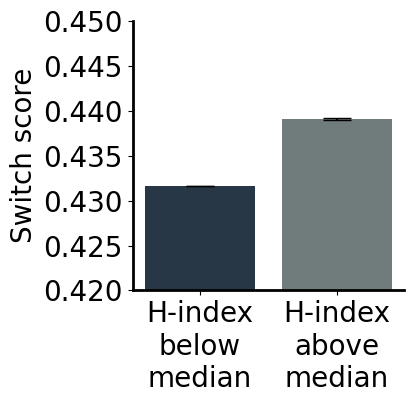

In [90]:
plt.subplots(1,1,figsize=(3.5,3.5))
ax = plt.subplot(1,1,1)
plt.bar(range(len(d1)), height=d1['switchScore'].values,yerr = d1['CI'].values, capsize = 10, color = ['#273746','#707B7C'])
plt.ylim(.42,.45)
plt.ylabel('Switch score',fontsize=20,)
plt.yticks(fontsize=20,)
plt.xticks([0,1],['H-index\nbelow\nmedian','H-index\nabove\nmedian'],fontsize=20)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_visible(False)
plt.savefig(savepath+"0d.svg",bbox_inches = 'tight')

In [102]:
d1 = df3.groupby('Top10')['switchScore'].mean().reset_index()
CI = [bootstrapped(f['switchScore'].dropna().values) for i,f in df3.groupby('Top10')]
d1['CI'] = CI

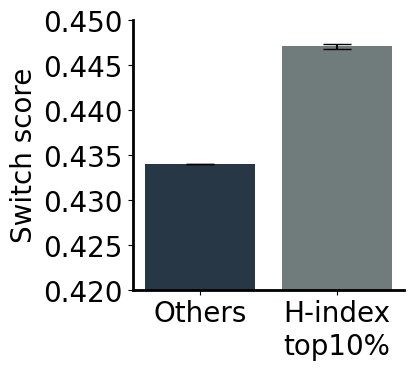

In [104]:
plt.subplots(1,1,figsize=(3.5,3.5))
ax = plt.subplot(1,1,1)
plt.bar(range(len(d1)), height=d1['switchScore'].values,yerr = d1['CI'].values, capsize = 10, color = ['#273746','#707B7C'])
plt.ylim(.42,.45)
plt.ylabel('Switch score',fontsize=20,)
plt.yticks(fontsize=20,)
plt.xticks([0,1],['Others','H-index\ntop10%'],fontsize=20)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_visible(False)
plt.savefig(savepath+"0d2.svg",bbox_inches = 'tight')

In [105]:
d1 = df2.groupby('Female')['switchScore'].mean().reset_index()
CI = [bootstrapped(f['switchScore'].dropna().values) for i,f in df2.groupby('Female')]
d1['CI'] = CI

In [21]:
d1 = df2.groupby('Female')['switchScore'].mean().reset_index()

In [23]:
d1['switchScore'].values[0] - d1['switchScore'].values[1]

-0.0018750390226655034

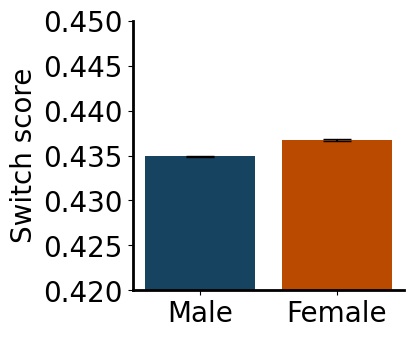

In [106]:
plt.subplots(1,1,figsize=(3.5,3.5))
ax = plt.subplot(1,1,1)
plt.bar(range(len(d1)), height=d1['switchScore'].values,yerr = d1['CI'].values, capsize = 10, color = ['#154360','#BA4A00'])
plt.ylim(.42,.45)
plt.ylabel('Switch score',fontsize=20,)
plt.yticks(fontsize=20,)
plt.xticks([0,1],['Male','Female'],fontsize=20)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_visible(False)
plt.savefig(savepath+"0c.svg",bbox_inches = 'tight')

In [76]:
d1 = df1.groupby('FieldID_AU')['switchScore'].mean().reset_index()
CI = [bootstrapped(f['switchScore'].dropna().values) for i,f in df1.groupby('FieldID_AU')]
d1['CI'] = CI

d1['FieldName'] = d1['FieldID_AU'].map(dffield.drop_duplicates(subset = 'FieldID').set_index('FieldID')['Field_Name'])
d1 = d1[d1['FieldID_AU']!=0]

d = pd.DataFrame({'FieldName':['Mathematics', 'Physics','Materials science','Geography','Geology','Environmental science',  'Engineering', 'Computer science', 'Chemistry', 'Biology','Medicine', 'Psychology', 'Business', 'Economics', 'Political science','Sociology', 'History','Philosophy','Art']})
d = d.merge(d1 , on = ['FieldName'] , how = 'left')
d['FieldName'] = ['Mathematics', 'Physics','Materials s.','Geography','Geology','Environmental s.',  'Engineering', 'Computer s.', 'Chemistry', 'Biology','Medicine', 'Psychology', 'Business', 'Economics', 'Political s.','Sociology', 'History','Philosophy','Art']

In [83]:
d['CI'] = d['CI'].apply(np.abs)

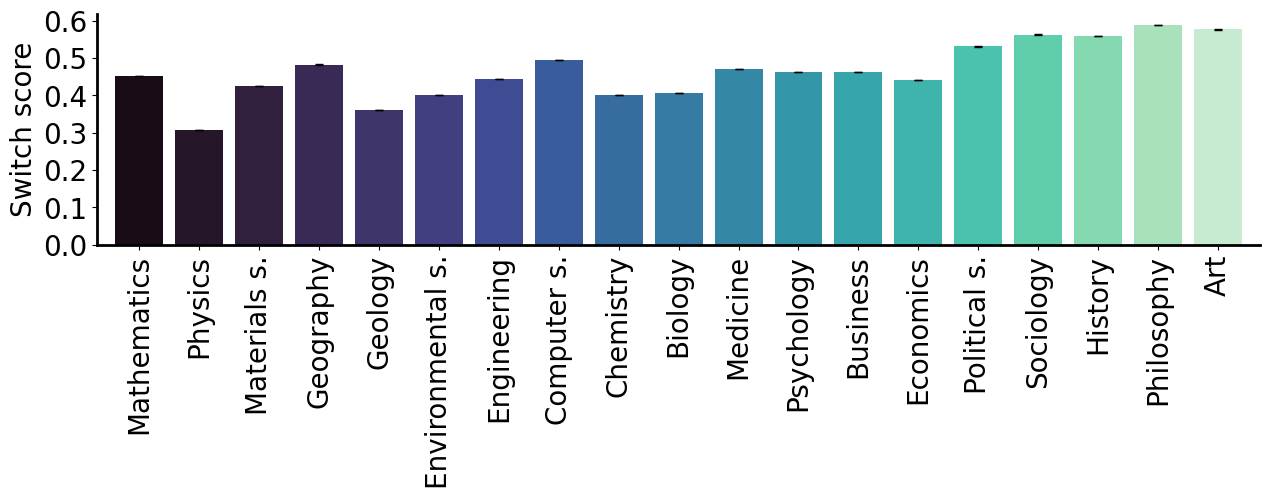

In [84]:
plt.subplots(1,1,figsize=(15,3))
ax = plt.subplot(1,1,1)
plt.bar(range(len(d)), height=d['switchScore'].values,yerr = d['CI'].values, capsize = 3, color = sns.color_palette("mako", 19))
plt.xlim(-.7,18.7)
plt.ylabel('Switch score',fontsize=20,)
plt.yticks(fontsize=20,)
plt.xticks(range(len(d1)),d['FieldName'].values,fontsize=20,rotation=90)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_visible(False)
plt.savefig(savepath+"0b.svg",bbox_inches = 'tight')

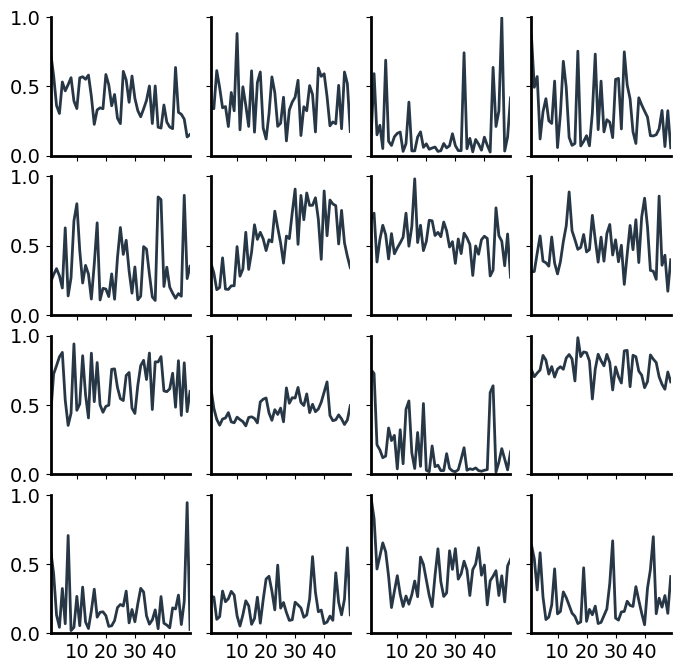

In [30]:
authorpubs = df1.groupby('AuthorID')['PaperID'].count().reset_index()
authorpubs2 = authorpubs[authorpubs['PaperID']>50]

plt.subplots(4,4,figsize=(8,8),sharex =True,sharey =True)
plt.subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=0.15,hspace=0.15)
Aulst = authorpubs2['AuthorID'].values
for i in range(16):
    ax = plt.subplot(4, 4, i+1)
    Y_D = df1.loc[df1['AuthorID']==Aulst[i],['switchScore']]
    ax.plot(range(50),Y_D['switchScore'].values[:50],c = '#273746',lw = 2)
    plt.xlim(1,49)
    plt.ylim(0,1)
    plt.xticks([10,20,30,40])
    ax.tick_params(axis='x',labelsize=14)
    ax.tick_params(axis='y',labelsize=14)
    ax.spines['bottom'].set_linewidth(2)
    ax.spines['left'].set_linewidth(2)
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)

plt.savefig(savepath+"0a.png",bbox_inches = 'tight')

# Trends

In [6]:
def set_fig_(ax , ifylabel):
    ax.set_xlabel('Year',size = 16)
    if ifylabel:
        ax.set_ylabel('Switch score',size = 16)
    ax.legend(fontsize=14,frameon=False,loc=3)
    ax.tick_params(axis='x',labelsize=14)
    ax.tick_params(axis='y',labelsize=14)
    plt.xlim(1970,2022)
    ax.spines['bottom'].set_linewidth(2)
    ax.spines['left'].set_linewidth(2)
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)

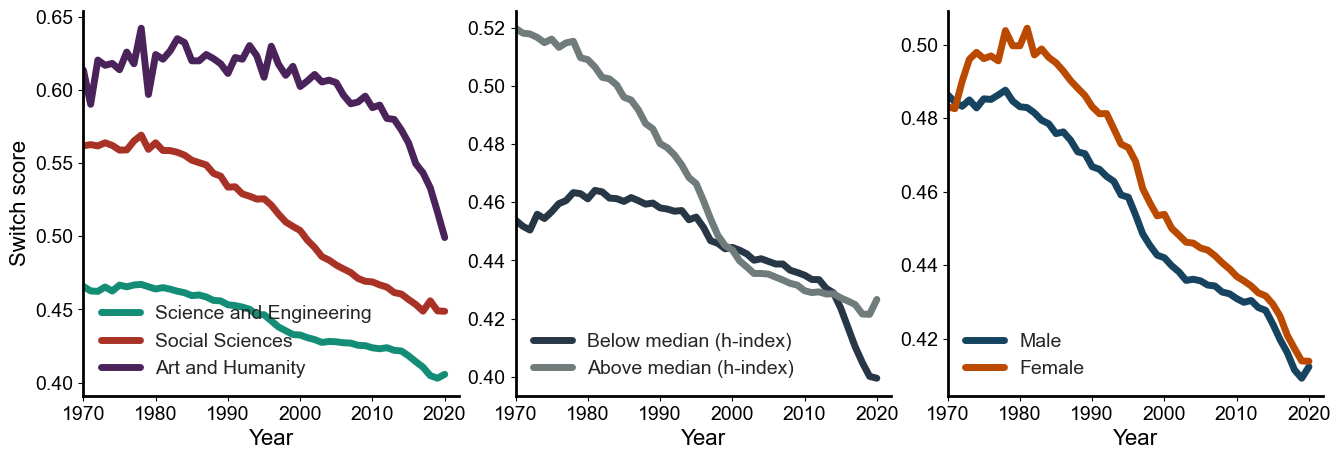

In [7]:
plt.subplots(1,3,figsize=(16,5),sharex =True)
plt.subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=0.15,hspace=0.1)
sns.set_theme(style="ticks")

ax1 = plt.subplot(1, 3, 1)
Y_D = df1.groupby(['Field_Name0','Year'])['switchScore'].mean().reset_index()
ax1.plot(Y_D.loc[Y_D['Field_Name0']=='Science and Engineering' , 'Year'].values[20:],Y_D.loc[Y_D['Field_Name0']=='Science and Engineering' , 'switchScore'].values[20:],c = '#138D75',lw = 5,label='Science and Engineering')
ax1.plot(Y_D.loc[Y_D['Field_Name0']=='Social Sciences' , 'Year'].values[20:],Y_D.loc[Y_D['Field_Name0']=='Social Sciences' , 'switchScore'].values[20:],c = '#A93226',lw = 5,label='Social Sciences')
ax1.plot(Y_D.loc[Y_D['Field_Name0']=='Art and Humanity' , 'Year'].values[20:],Y_D.loc[Y_D['Field_Name0']=='Art and Humanity' , 'switchScore'].values[20:],c = '#4A235A',lw = 5,label='Art and Humanity')
set_fig_(ax1,1)
ax2 = plt.subplot(1, 3, 2)
Y_D = df3.groupby(['Abovem','Year'])['switchScore'].mean().reset_index()
ax2.plot(Y_D.loc[Y_D['Abovem']==0 , 'Year'].values[20:],Y_D.loc[Y_D['Abovem']==0 , 'switchScore'].values[20:],c = '#273746',lw = 5,label='Below median (h-index)')
ax2.plot(Y_D.loc[Y_D['Abovem']==1 , 'Year'].values[20:],Y_D.loc[Y_D['Abovem']==1 , 'switchScore'].values[20:],c = '#707B7C',lw = 5,label='Above median (h-index)')
set_fig_(ax2,0)
ax3 = plt.subplot(1, 3, 3)
Y_D = df2.groupby(['Female','Year'])['switchScore'].mean().reset_index()
ax3.plot(Y_D.loc[Y_D['Female']==0 , 'Year'].values[20:],Y_D.loc[Y_D['Female']==0 , 'switchScore'].values[20:],c = '#154360',lw = 5,label='Male')
ax3.plot(Y_D.loc[Y_D['Female']==1 , 'Year'].values[20:],Y_D.loc[Y_D['Female']==1 , 'switchScore'].values[20:],c = '#BA4A00',lw = 5,label='Female')
set_fig_(ax3,0)

plt.savefig(savepath+"a.svg",bbox_inches = 'tight')

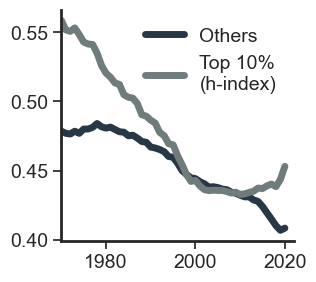

In [15]:
Y_D = df3.groupby(['Top10','Year'])['switchScore'].mean().reset_index()
fig,ax=plt.subplots(1, 1, figsize=[3, 3])
ax.plot(Y_D.loc[Y_D['Top10']==0 , 'Year'].values[20:],Y_D.loc[Y_D['Top10']==0 , 'switchScore'].values[20:],c = '#273746',lw = 5,label='Others')
ax.plot(Y_D.loc[Y_D['Top10']==1 , 'Year'].values[20:],Y_D.loc[Y_D['Top10']==1 , 'switchScore'].values[20:],c = '#707B7C',lw = 5,label='Top 10%\n(h-index)')
ax.legend(fontsize=14,frameon=False,loc=1)
plt.xlim(1970,2022)
ax.tick_params(axis='x',labelsize=14)
ax.tick_params(axis='y',labelsize=14)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.savefig(savepath + "b.svg",bbox_inches = 'tight')

# Trend 2

In [8]:
def get_year_cat(x):
    if x<1980:
        return '<1980'
    elif x<1990:
        return '1980s'
    elif x<2000:
        return '1990s'
    elif x<2010:
        return '2000s'
    else:
        return '2010s'
df1['yearcat'] = df1['Year'].apply(get_year_cat)

In [9]:
colorsyear = ['#3498DB','#1ABC9C','#F1C40F','#D35400','#A93226']
labellst = ['<1980','1980s','1990s','2000s','2010s',]

In [10]:
def set_fig_(ax , ylabel , xlabel=0):
    ax.set_xlabel(xlabel,size = 16)
    ax.set_ylabel(ylabel,size = 16)
    ax.tick_params(axis='x',labelsize=14)
    ax.tick_params(axis='y',labelsize=14)
    
    ax.spines['bottom'].set_linewidth(2)
    ax.spines['left'].set_linewidth(2)
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)

In [12]:
formula = 'switchScore~ Year'
# fit the OLS model
model = sm.formula.ols(formula=formula, data=df1[df1['Year']>1970]).fit()

In [17]:
model.params

Intercept    3.513723
Year        -0.001535
dtype: float64

D:\users\Conda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\users\Conda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\users\Conda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\users\Conda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', Tru

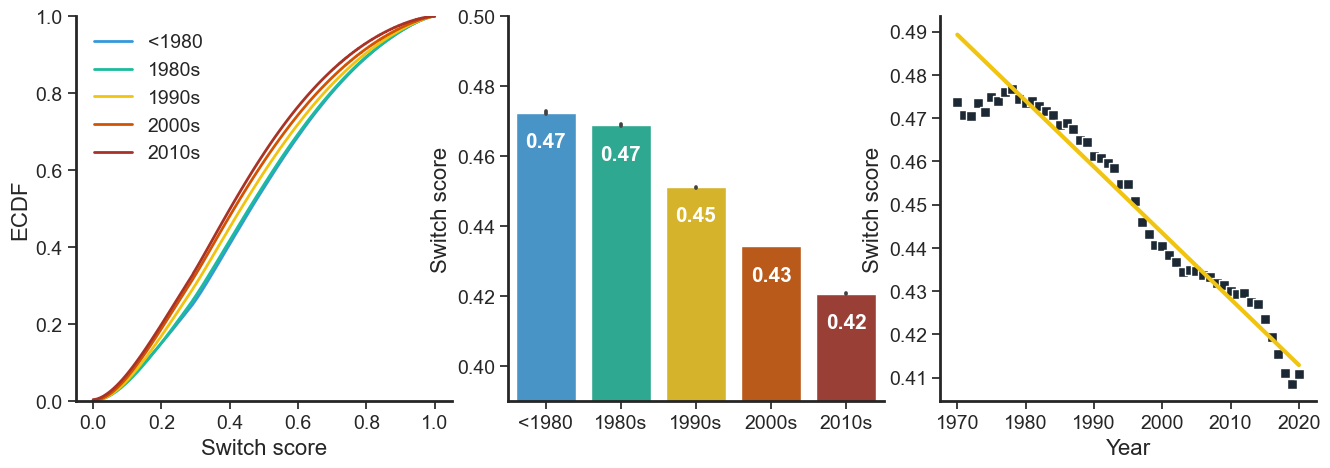

In [11]:
plt.subplots(1,3,figsize=(16,5))
plt.subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=0.15,hspace=0.1)
sns.set_theme(style="ticks")

ax1 = plt.subplot(1, 3, 1)
for i,label in enumerate(labellst):
    sns.ecdfplot(data=df1.loc[df1['yearcat']==label , 'switchScore'],color=colorsyear[i],lw=2,label=label)
set_fig_(ax1,'ECDF','Switch score')
ax1.legend(fontsize=14,frameon=False)

ax2 = plt.subplot(1, 3, 2)
sns.barplot(df1, x="yearcat", y="switchScore",palette=colorsyear,order=labellst, n_boot=5)
for i in range(5):
    d = df1.loc[df1['yearcat']==labellst[i],"switchScore"].mean()
    plt.text(i,d-0.01,str(d.round(2)),c = 'white', fontsize=15, ha='center', fontweight='bold')
set_fig_(ax2,'Switch score','')
plt.ylim(.39,.5)

ax3 = plt.subplot(1, 3, 3)
dff1 = df1[df1['Year']>=1970].groupby('Year')['switchScore'].mean().reset_index()
ax3.scatter(dff1['Year'], dff1['switchScore'],marker='s', c = "#1C2833",edgecolors='white',s=60)
sns.regplot(df1[df1['Year']>=1970], x="Year", y="switchScore", n_boot=5, color = "#F1C40F",scatter = False,line_kws={"linewidth": 3})
set_fig_(ax3,'Switch score','Year')

plt.savefig(savepath+"5.svg",bbox_inches = 'tight')

D:\users\Conda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\users\Conda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\users\Conda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\users\Conda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', Tru

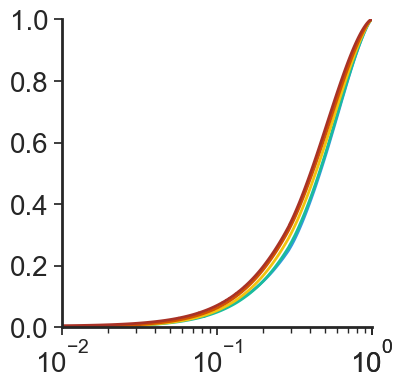

In [57]:
f, ax = plt.subplots(figsize=(4, 4))
for i,label in enumerate(labellst):
    sns.ecdfplot(data=df1.loc[df1['yearcat']==label , 'switchScore'],color=colorsyear[i],lw=2)
plt.xscale('log')
plt.xlim(10e-3,1)
plt.xticks([10e-3,10e-2,10e-1,1],fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('')
plt.ylabel('')
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.savefig(savepath+"5a.svg",bbox_inches = 'tight')

# switch and career age

In [13]:
def set_fig_(ax , ifylabel , xlabel=0):
    ax.set_xlabel(xlabel,size = 16)
    if ifylabel:
        ax.set_ylabel('Switch score',size = 16)
    ax.legend(fontsize=14,frameon=False)
    ax.tick_params(axis='x',labelsize=14)
    ax.tick_params(axis='y',labelsize=14)
    
    ax.spines['bottom'].set_linewidth(2)
    ax.spines['left'].set_linewidth(2)
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)

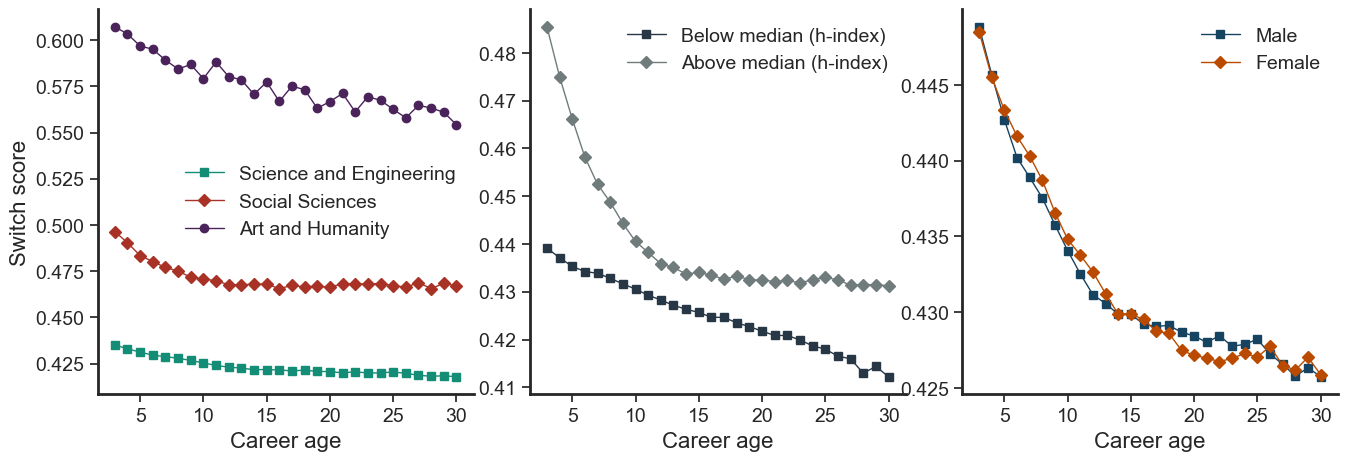

In [14]:
plt.subplots(1,3,figsize=(16,5),sharex =True)
plt.subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=0.15,hspace=0.1)
sns.set_theme(style="ticks")

ax1 = plt.subplot(1, 3, 1)
Y_D = df1.groupby(['Field_Name0','Age'])['switchScore'].mean().reset_index()
ax1.plot(Y_D.loc[Y_D['Field_Name0']=='Science and Engineering' , 'Age'].values[3:31],Y_D.loc[Y_D['Field_Name0']=='Science and Engineering' , 'switchScore'].values[3:31],c = '#138D75',marker = 's',lw = 1,label='Science and Engineering')
ax1.plot(Y_D.loc[Y_D['Field_Name0']=='Social Sciences' , 'Age'].values[3:31],Y_D.loc[Y_D['Field_Name0']=='Social Sciences' , 'switchScore'].values[3:31],c = '#A93226',marker = 'D',lw = 1,label='Social Sciences')
ax1.plot(Y_D.loc[Y_D['Field_Name0']=='Art and Humanity' , 'Age'].values[3:31],Y_D.loc[Y_D['Field_Name0']=='Art and Humanity' , 'switchScore'].values[3:31],c = '#4A235A',marker = 'o',lw = 1,label='Art and Humanity')
set_fig_(ax1,1,'Career age')
ax2 = plt.subplot(1, 3, 2)
Y_D = df3.groupby(['Abovem','Age'])['switchScore'].mean().reset_index()
ax2.plot(Y_D.loc[Y_D['Abovem']==0 , 'Age'].values[3:31],Y_D.loc[Y_D['Abovem']==0 , 'switchScore'].values[3:31],c = '#273746',marker = 's',lw = 1,label='Below median (h-index)')
ax2.plot(Y_D.loc[Y_D['Abovem']==1 , 'Age'].values[3:31],Y_D.loc[Y_D['Abovem']==1 , 'switchScore'].values[3:31],c = '#707B7C',marker = 'D',lw = 1,label='Above median (h-index)')
set_fig_(ax2,0,'Career age')
ax3 = plt.subplot(1, 3, 3)
Y_D = df2.groupby(['Female','Age'])['switchScore'].mean().reset_index()
ax3.plot(Y_D.loc[Y_D['Female']==0 , 'Age'].values[3:31],Y_D.loc[Y_D['Female']==0 , 'switchScore'].values[3:31],c = '#154360',marker = 's',lw = 1,label='Male')
ax3.plot(Y_D.loc[Y_D['Female']==1 , 'Age'].values[3:31],Y_D.loc[Y_D['Female']==1 , 'switchScore'].values[3:31],c = '#BA4A00',marker = 'D',lw = 1,label='Female')
set_fig_(ax3,0,'Career age')

plt.savefig(savepath+"2a.svg",bbox_inches = 'tight')

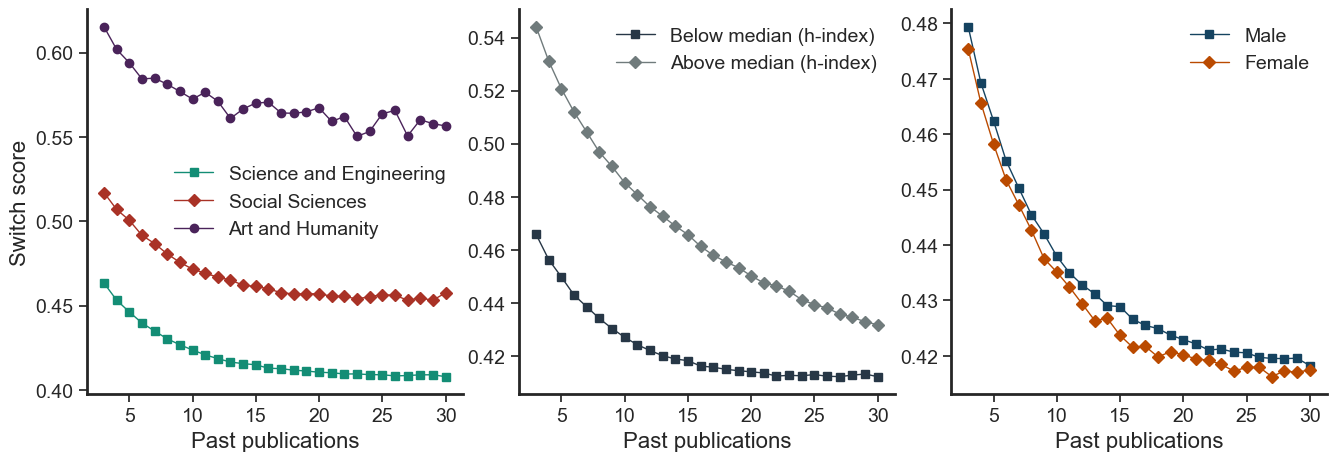

In [15]:
plt.subplots(1,3,figsize=(16,5),sharex =True)
plt.subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=0.15,hspace=0.1)
sns.set_theme(style="ticks")

ax1 = plt.subplot(1, 3, 1)
Y_D = df1.groupby(['Field_Name0','Past_Pub'])['switchScore'].mean().reset_index()
ax1.plot(Y_D.loc[Y_D['Field_Name0']=='Science and Engineering' , 'Past_Pub'].values[3:31],Y_D.loc[Y_D['Field_Name0']=='Science and Engineering' , 'switchScore'].values[3:31],c = '#138D75',marker = 's',lw = 1,label='Science and Engineering')
ax1.plot(Y_D.loc[Y_D['Field_Name0']=='Social Sciences' , 'Past_Pub'].values[3:31],Y_D.loc[Y_D['Field_Name0']=='Social Sciences' , 'switchScore'].values[3:31],c = '#A93226',marker = 'D',lw = 1,label='Social Sciences')
ax1.plot(Y_D.loc[Y_D['Field_Name0']=='Art and Humanity' , 'Past_Pub'].values[3:31],Y_D.loc[Y_D['Field_Name0']=='Art and Humanity' , 'switchScore'].values[3:31],c = '#4A235A',marker = 'o',lw = 1,label='Art and Humanity')
set_fig_(ax1,1,'Past publications')
ax2 = plt.subplot(1, 3, 2)
Y_D = df3.groupby(['Abovem','Past_Pub'])['switchScore'].mean().reset_index()
ax2.plot(Y_D.loc[Y_D['Abovem']==0 , 'Past_Pub'].values[3:31],Y_D.loc[Y_D['Abovem']==0 , 'switchScore'].values[3:31],c = '#273746',marker = 's',lw = 1,label='Below median (h-index)')
ax2.plot(Y_D.loc[Y_D['Abovem']==1 , 'Past_Pub'].values[3:31],Y_D.loc[Y_D['Abovem']==1 , 'switchScore'].values[3:31],c = '#707B7C',marker = 'D',lw = 1,label='Above median (h-index)')
set_fig_(ax2,0,'Past publications')
ax3 = plt.subplot(1, 3, 3)
Y_D = df2.groupby(['Female','Past_Pub'])['switchScore'].mean().reset_index()
ax3.plot(Y_D.loc[Y_D['Female']==0 , 'Past_Pub'].values[3:31],Y_D.loc[Y_D['Female']==0 , 'switchScore'].values[3:31],c = '#154360',marker = 's',lw = 1,label='Male')
ax3.plot(Y_D.loc[Y_D['Female']==1 , 'Past_Pub'].values[3:31],Y_D.loc[Y_D['Female']==1 , 'switchScore'].values[3:31],c = '#BA4A00',marker = 'D',lw = 1,label='Female')
set_fig_(ax3,0,'Past publications')

plt.savefig(savepath+"2b.svg",bbox_inches = 'tight')

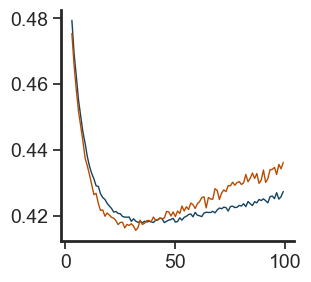

In [19]:
fig,ax=plt.subplots(1, 1, figsize=[3, 3])
Y_D = df2.groupby(['Female','Past_Pub'])['switchScore'].mean().reset_index()
ax.plot(Y_D.loc[Y_D['Female']==0 , 'Past_Pub'].values[3:100],Y_D.loc[Y_D['Female']==0 , 'switchScore'].values[3:100],c = '#154360',lw = 1,label='Male')
ax.plot(Y_D.loc[Y_D['Female']==1 , 'Past_Pub'].values[3:100],Y_D.loc[Y_D['Female']==1 , 'switchScore'].values[3:100],c = '#BA4A00',lw = 1,label='Female')
ax.tick_params(axis='x',labelsize=14)
ax.tick_params(axis='y',labelsize=14)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.savefig(savepath + "2c.svg",bbox_inches = 'tight')

# Start year

In [18]:
def set_fig_(ax , ifylabel , xlabel=0):
    ax.set_xlabel(xlabel,size = 16)
    if ifylabel:
        ax.set_ylabel('Switch score',size = 16)
    ax.legend(fontsize=14,frameon=False)
    ax.tick_params(axis='x',labelsize=14)
    ax.tick_params(axis='y',labelsize=14)
    
    ax.spines['bottom'].set_linewidth(2)
    ax.spines['left'].set_linewidth(2)
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)

In [19]:
df1['Agebin'] = 0
df1.loc[df1['Age']<10 , 'Agebin'] = 1
df1.loc[(df1['Age']>=10)&(df1['Age']<20) , 'Agebin'] = 2
df1.loc[(df1['Age']>=20)&(df1['Age']<30) , 'Agebin'] = 3

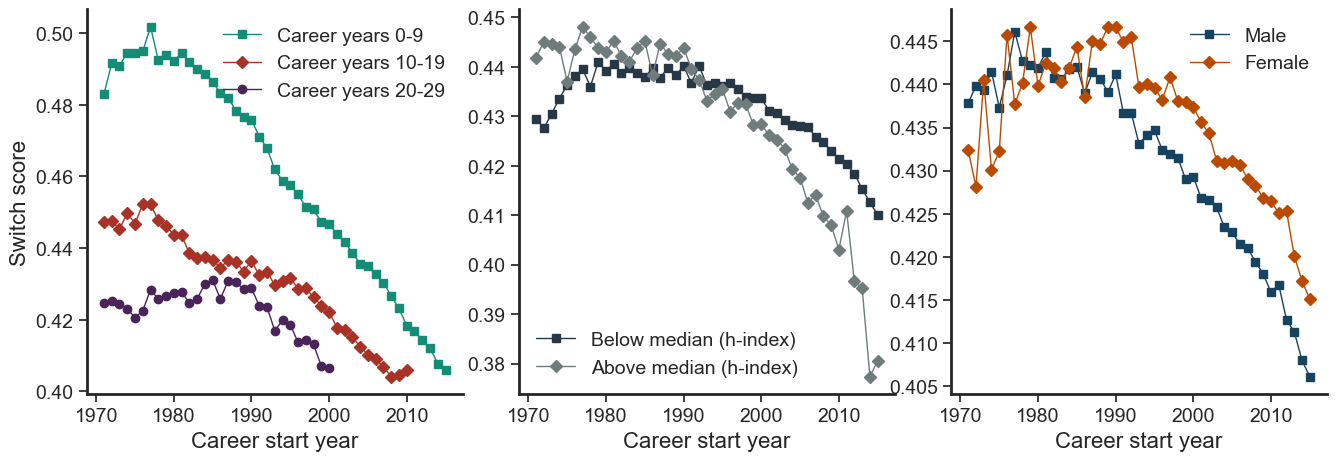

In [20]:
plt.subplots(1,3,figsize=(16,5),sharex =True)
plt.subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=0.15,hspace=0.1)
sns.set_theme(style="ticks")

ax1 = plt.subplot(1, 3, 1)
Y_D = df1.groupby(['Agebin','Start_year'])['switchScore'].mean().reset_index()
ax1.plot(Y_D.loc[(Y_D['Agebin']==1) & (Y_D['Start_year']>1970) & (Y_D['Start_year']<2016), 'Start_year'].values,Y_D.loc[(Y_D['Agebin']==1) & (Y_D['Start_year']>1970) & (Y_D['Start_year']<2016), 'switchScore'].values,c = '#138D75',marker = 's',lw = 1, label='Career years 0-9')
ax1.plot(Y_D.loc[(Y_D['Agebin']==2) & (Y_D['Start_year']>1970) & (Y_D['Start_year']<2016), 'Start_year'].values,Y_D.loc[(Y_D['Agebin']==2) & (Y_D['Start_year']>1970) & (Y_D['Start_year']<2016) , 'switchScore'].values,c = '#A93226',marker = 'D',lw = 1,label='Career years 10-19')
ax1.plot(Y_D.loc[(Y_D['Agebin']==3) & (Y_D['Start_year']>1970) & (Y_D['Start_year']<2016), 'Start_year'].values,Y_D.loc[(Y_D['Agebin']==3) & (Y_D['Start_year']>1970) & (Y_D['Start_year']<2016) , 'switchScore'].values,c = '#4A235A',marker = 'o',lw = 1,label='Career years 20-29')
set_fig_(ax1,1,'Career start year')
ax2 = plt.subplot(1, 3, 2)
Y_D = df3.groupby(['Abovem','Start_year'])['switchScore'].mean().reset_index()
ax2.plot(Y_D.loc[(Y_D['Abovem']==0) & (Y_D['Start_year']>1970) & (Y_D['Start_year']<2016), 'Start_year'].values,Y_D.loc[(Y_D['Abovem']==0) & (Y_D['Start_year']>1970) & (Y_D['Start_year']<2016) , 'switchScore'].values,c = '#273746',marker = 's',lw = 1,label='Below median (h-index)')
ax2.plot(Y_D.loc[(Y_D['Abovem']==1) & (Y_D['Start_year']>1970) & (Y_D['Start_year']<2016), 'Start_year'].values,Y_D.loc[(Y_D['Abovem']==1) & (Y_D['Start_year']>1970) & (Y_D['Start_year']<2016) , 'switchScore'].values,c = '#707B7C',marker = 'D',lw = 1,label='Above median (h-index)')
set_fig_(ax2,0,'Career start year')
ax3 = plt.subplot(1, 3, 3)
Y_D = df2.groupby(['Female','Start_year'])['switchScore'].mean().reset_index()
ax3.plot(Y_D.loc[(Y_D['Female']==0) & (Y_D['Start_year']>1970) & (Y_D['Start_year']<2016), 'Start_year'].values,Y_D.loc[(Y_D['Female']==0) & (Y_D['Start_year']>1970) & (Y_D['Start_year']<2016) , 'switchScore'].values,c = '#154360',marker = 's',lw = 1,label='Male')
ax3.plot(Y_D.loc[(Y_D['Female']==1) & (Y_D['Start_year']>1970) & (Y_D['Start_year']<2016), 'Start_year'].values,Y_D.loc[(Y_D['Female']==1) & (Y_D['Start_year']>1970) & (Y_D['Start_year']<2016) , 'switchScore'].values,c = '#BA4A00',marker = 'D',lw = 1,label='Female')
set_fig_(ax3,0,'Career start year')

plt.savefig(savepath+"4a.svg",bbox_inches = 'tight')

# Distribution

In [24]:
Y_D1 = df1.groupby(['Field_Name0','Year'])['PaperID'].nunique().reset_index()
Y_D2 = df1.groupby(['Year'])['AuthorID'].nunique().reset_index()
Y_D21 = df2.groupby(['Female','Year'])['AuthorID'].nunique().reset_index()

In [25]:
df4 = pd.read_csv(r'E:\NETDATA\SciSciNet\1950-2020\Paper5.csv.zip' , usecols=['PaperID','Year','JournalID'])
Y_D3 = df4.groupby(['Year'])['JournalID'].nunique().reset_index()

In [26]:
def set_fig_(ax , ylabel=0):
    ax.set_xlabel('Year',size = 16)
    ax.set_ylabel(ylabel,size = 16)
    ax.legend(fontsize=14,frameon=False)
    ax.tick_params(axis='x',labelsize=14)
    ax.tick_params(axis='y',labelsize=14)
    ax.set_yscale("log")
    ax.spines['bottom'].set_linewidth(2)
    ax.spines['left'].set_linewidth(2)
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


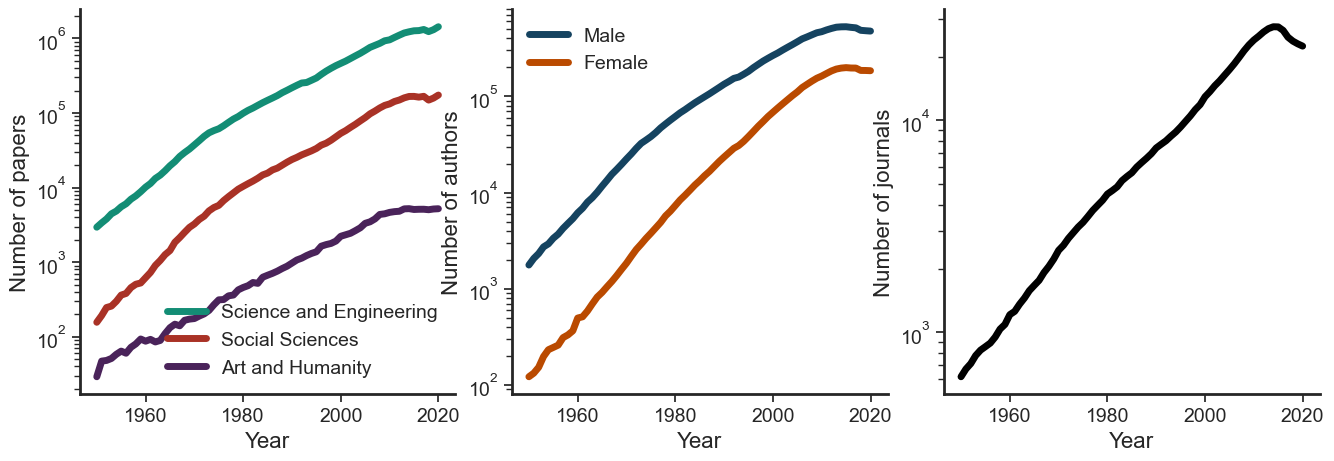

In [27]:
plt.subplots(1,3,figsize=(16,5),sharex =True)
plt.subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=0.15,hspace=0.1)
sns.set_theme(style="ticks")

ax1 = plt.subplot(1, 3, 1)
ax1.plot(Y_D1.loc[Y_D1['Field_Name0']=='Science and Engineering' , 'Year'].values,Y_D1.loc[Y_D1['Field_Name0']=='Science and Engineering' , 'PaperID'].values,c = '#138D75',lw = 5,label='Science and Engineering')
ax1.plot(Y_D1.loc[Y_D1['Field_Name0']=='Social Sciences' , 'Year'].values,Y_D1.loc[Y_D1['Field_Name0']=='Social Sciences' , 'PaperID'].values,c = '#A93226',lw = 5,label='Social Sciences')
ax1.plot(Y_D1.loc[Y_D1['Field_Name0']=='Art and Humanity' , 'Year'].values,Y_D1.loc[Y_D1['Field_Name0']=='Art and Humanity' , 'PaperID'].values,c = '#4A235A',lw = 5,label='Art and Humanity')
set_fig_(ax1,'Number of papers')
ax2 = plt.subplot(1, 3, 2)
ax2.plot(Y_D21.loc[Y_D21['Female']==0 , 'Year'].values,Y_D21.loc[Y_D21['Female']==0 , 'AuthorID'].values,c = '#154360',lw = 5,label='Male')
ax2.plot(Y_D21.loc[Y_D21['Female']==1 , 'Year'].values,Y_D21.loc[Y_D21['Female']==1 , 'AuthorID'].values,c = '#BA4A00',lw = 5,label='Female')
set_fig_(ax2,'Number of authors')
ax3 = plt.subplot(1, 3, 3)
ax3.plot(Y_D3['Year'].values,Y_D3['JournalID'].values,c = 'Black',lw = 5)
set_fig_(ax3,'Number of journals')

plt.savefig(savepath+"1a.svg",bbox_inches = 'tight')

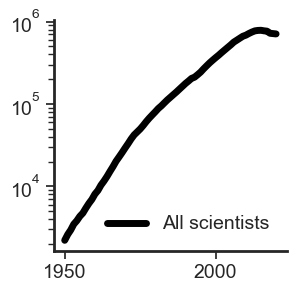

In [28]:
fig,ax=plt.subplots(1, 1, figsize=[3, 3])
ax.plot(Y_D2['Year'].values,Y_D2['AuthorID'].values,c = 'Black',lw = 5,label='All scientists')
ax.legend(fontsize=14,frameon=False,loc=4)
ax.set_yscale("log")
ax.tick_params(axis='x',labelsize=14)
ax.tick_params(axis='y',labelsize=14)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.savefig(savepath + "1b.svg",bbox_inches = 'tight')

D:\users\Conda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\users\Conda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


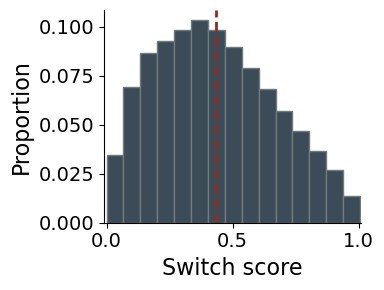

In [7]:
fig,ax=plt.subplots(1, 1, figsize=[4, 3])
sns.histplot(df1['switchScore'],binwidth=.067,color = '#273746',edgecolor = '#707B7C', alpha = .9, stat='probability')
ax.set_xlabel('Switch score',size = 16)
ax.tick_params(axis='x',labelsize=14)
ax.tick_params(axis='y',labelsize=14)
ax.set_ylabel('Proportion',size = 16)
plt.axvline(df1['switchScore'].mean(), c="#922B21", linestyle="--", linewidth=2)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.set_xlim([-.01,1.01])
plt.tight_layout()
plt.savefig(savepath + "1d.svg",bbox_inches = 'tight')